In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
from google.colab import files
files.upload()

df = pd.read_csv("cancer.csv")
df.head()


Saving cancer.csv to cancer.csv


,id,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,Unnamed: 32
0,842302,M,10.38,1001.0,0.11840,0.27760,0.3001,0.07860,NaN
1,842517,M,17.77,1326.0,0.08474,0.10070,0.1811,0.05667,NaN
2,84300903,B,12.54,1134.0,0.10270,0.06791,0.1852,0.05263,NaN
3,84348301,B,10.80,780.2,0.08474,0.04550,0.1811,0.05200,NaN
4,84358402,M,18.31,1203.0,0.09830,0.15850,0.2398,0.06110,NaN


In [6]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nColumn Names:", df.columns.tolist())


Shape: (5, 9)

Missing values:
 id                        0
diagnosis                 0
texture_mean              0
area_mean                 0
smoothness_mean           0
compactness_mean          0
symmetry_mean             0
fractal_dimension_mean    0
Unnamed: 32               5
dtype: int64

Column Names: ['id', 'diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'Unnamed: 32']


In [7]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

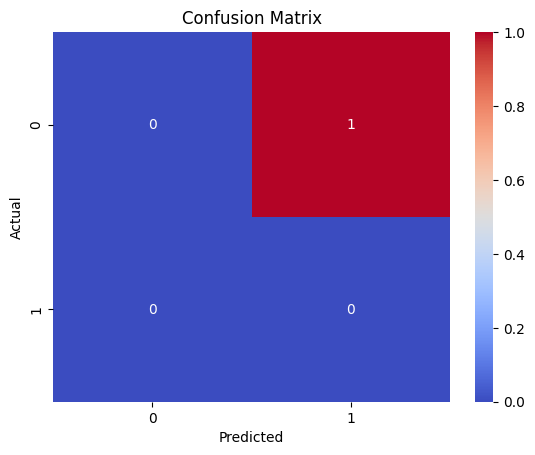

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
